In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [108]:
#TODO: agregar seed, agregar conteo de pasos aceptados, correr todo con 0.1 dT.

En primer lugar realizamos una única simulacion de 200000 pasos con dt=0.01 a T = 1.5 para estimar el tiempo de autocorrelación.

In [12]:
corr_df = pd.read_csv("corr.dat", sep=r",")
corr_df.tail()

,step,E total,Ep,Ek,F max,v max,T,p
19995,*****,270.277408,-218.173674,488.451082,53.489689,4.025387,1.636352,0.453560
19996,*****,273.264310,-213.102886,486.367196,89.029446,3.989424,1.629371,0.368484
19997,*****,264.111464,-219.777483,483.888947,60.451811,4.045471,1.621068,0.355248
19998,*****,261.367475,-217.527316,478.894791,153.759046,4.237285,1.604338,0.334583
19999,*****,268.441251,-223.268104,491.709355,86.446084,3.859153,1.647268,0.358802


In [13]:
def C_t(serie,t):
    """
    Toma una serie (pd.Series o np.array) de datos y un tiempo t y devuelve el valor de C(t)
    """
    avg_sqr = serie.mean()**2
    vals = []
    for i in range(len(serie)-t):
        vals.append(serie[i]*serie[i+t]-avg_sqr)
    return np.array(vals).mean()

In [14]:
corr = []
for i in range(1,100):
    corr.append(C_t(corr_df["E total"],i))

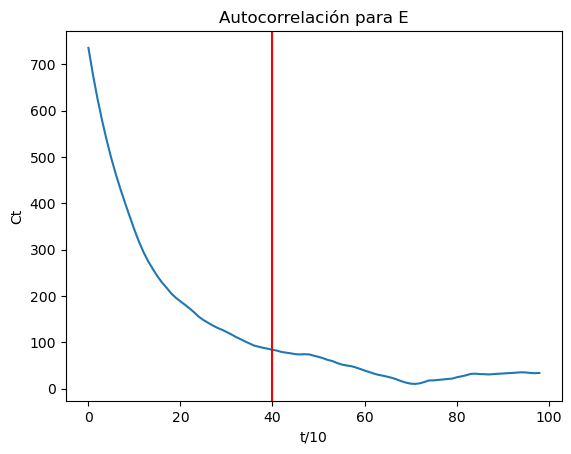

In [15]:
plt.plot(corr)
plt.title("Autocorrelación para E")
plt.axvline(x=40, color = "red")
plt.xlabel("t/10")
plt.ylabel("Ct")
plt.show()

Podemos decir que alrededor de 400 pasos (tau = 400*dt) se decorrelacionan los valores. En todo lo que sigue se toman los valores cada tau = 400 * 0.01 = 4

**Temperatura constante, variando densidad**

In [ ]:
T = 1.1
n_steps = 500000
L = 10.0
rho = [0.001,0.01,0.1,0.15,0.2,0.3,0.35,0.4,0.5,0.55,0.6,0.7,0.8,0.9,1.0]
dt = 0.0005

In [ ]:
for r in rho:
    with open("in.dat","w") as file:
        file.write(f"{T}\n{r}\n{L}\n{n_steps}\n{dt}")
    os.system("./main")
    os.system(f"mv produccion.dat out_{r}.dat")
    os.system(f"mv produccion.xyz prod_{r}.xyz")

           1
step:   100
  0.57277652169485405     
step:   200
  0.45074026676488566     
step:   300
  0.98868304172619337     
step:   400
   1.2144842131143054     
step:   500
   1.5007404096171775     
step:   600
   1.2189946223113410     
step:   700
  0.37648655121851976     
step:   800
  0.21914914930574406     
step:   900
  0.42585204497290102     
step:  1000
  0.42495283904144915     
step:  1100
  0.52331677786112163     
step:  1200
  0.42151361831345907     
step:  1300
   4.8772812326104975E-002
step:  1400
  0.75476808892263147     
step:  1500
  0.72280841688774677     
step:  1600
  0.81647170369998434     
step:  1700
  0.58633665224384590     
step:  1800
  0.77085974769444110     
step:  1900
   1.4491629329337170     
step:  2000
   1.9196539790711413     
step:  2100
   1.2785562518054601     
step:  2200
   1.0293254999835320     
step:  2300
   1.1325697046570675     
step:  2400
   1.5466098537288953     
step:  2500
   1.8122970228663799     
step:  2600


In [28]:
dfs = {str(i):0 for i in rho}
for r in rho:
    df = pd.read_csv(f"results_T_cte/out_{r}.dat", sep=r",", comment="#")
    dfs[str(r)] = df

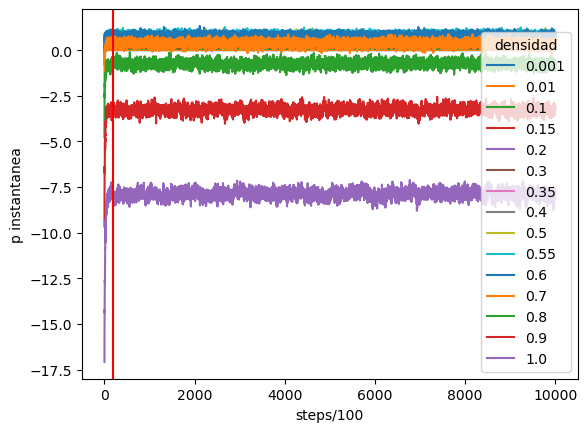

In [39]:
for k,v in dfs.items():
    plt.plot(v['p'], label=k)
plt.axvline(x=200, color='red')
plt.xlabel("steps/100")
plt.ylabel("p instantanea")
plt.legend(title="densidad")
plt.show()

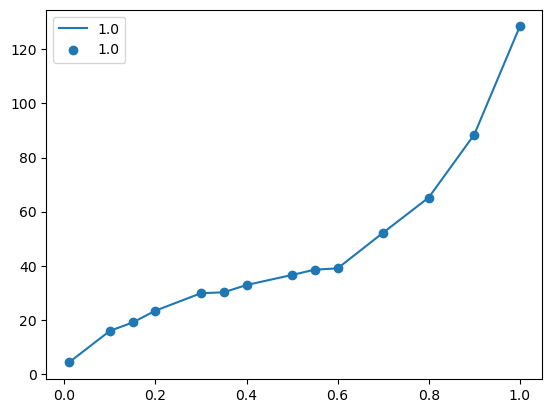

In [31]:
plt.plot(np.array(rho[1:]),[v['E total'].std() for v in dfs.values()][1:], label=k)
plt.scatter(x = np.array(rho[1:]),y = [v['E total'].std() for v in dfs.values()][1:], label=k)
plt.legend()
plt.show()

In [42]:
p_means = [i['p'][200:].mean() for i in dfs.values()]
p_dev = [i['p'][200:].std() for i in dfs.values()]
p_std_err = [i['p'][200::40].std()/np.sqrt(250) for i in dfs.values()] #el error se estima usando valor cada 4000 pasos

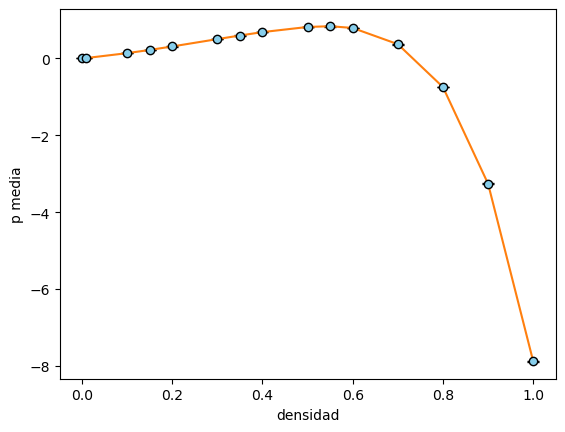

In [43]:
plt.errorbar(
    rho, p_means,
    yerr=p_std_err,            
    fmt='o',                        
    ecolor='black', elinewidth=1,   
    capsize=4,                      
    markerfacecolor='skyblue', 
    markeredgecolor='k'
)
plt.xlabel("densidad")
plt.ylabel("p media")
plt.plot(rho,p_means)
plt.show()

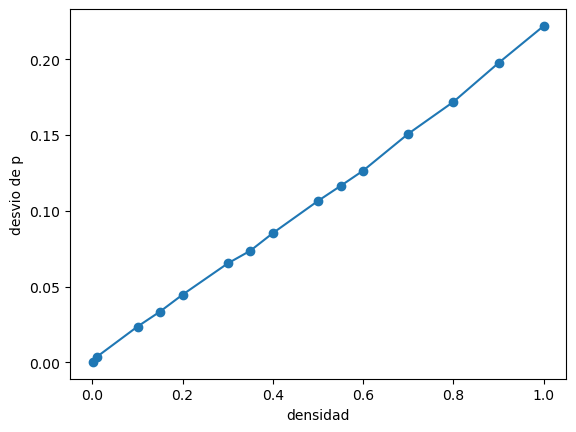

In [45]:
plt.plot(rho,p_dev)
plt.scatter(rho,p_dev)
plt.ylabel("desvio de p")
plt.xlabel("densidad")
plt.show()

Las fluctuaciones de presion son inversamente proporcionales a la compresibilidad, sistemas menos compresibles (solidos) presentan mayores fluctuaciones. Esto se observa, densidades mayores donde el fluido de vdw asume un estado solido (demostrado tambien por los bajos valores de presion) muestran mayores fluctuaciones.

In [48]:
rho = 0.4
n_steps = 100000
L = 10.0
Ts = [0.7,0.75,0.8,0.9,0.95,1.0,1.1,1.15,1.2,1.3,1.4]
dt = 0.001

In [12]:
for T in Ts:
    with open("in.dat","w") as file:
        file.write(f"{T}\n{rho}\n{L}\n{n_steps}\n{dt}")
    os.system("./main")
    os.system(f"mv produccion.dat out_{T}.dat")
    os.system(f"mv produccion.xyz prod_{T}.xyz")

         400
step:   100
  -448.68048099866257     
step:   200
  -479.01165960269520     
step:   300
  -498.23093213549805     
step:   400
  -505.94371166383161     
step:   500
  -510.54650342462503     
step:   600
  -521.88760239441012     
step:   700
  -529.38178299103197     
step:   800
  -537.25314712482646     
step:   900
  -530.41014806807402     
step:  1000
  -537.12915369905386     
step:  1100
  -541.84899045289035     
step:  1200
  -544.74718577605086     
step:  1300
  -532.47435377333693     
step:  1400
  -550.34678536349179     
step:  1500
  -556.74996801550083     
step:  1600
  -569.87771707012132     
step:  1700
  -575.45281557944782     
step:  1800
  -580.81656605748617     
step:  1900
  -589.77437290184866     
step:  2000
  -590.67621340361165     
step:  2100
  -595.84087298101213     
step:  2200
  -610.86867016355154     
step:  2300
  -609.89523717932832     
step:  2400
  -620.24057148573570     
step:  2500
  -626.10433813539044     
step:  2600


In [58]:
dfs = {str(i):0 for i in Ts}
for T in Ts:
    df = pd.read_csv(f"results_rho_cte/out_{T}.dat", sep=r",", comment="#")
    dfs[str(T)] = df

In [59]:
p_means = [i['p'][200:].mean() for i in dfs.values()]
p_dev = [i['p'][200:].std() for i in dfs.values()]
p_std_err = [i['p'][200::4].std()/np.sqrt(250) for i in dfs.values()]

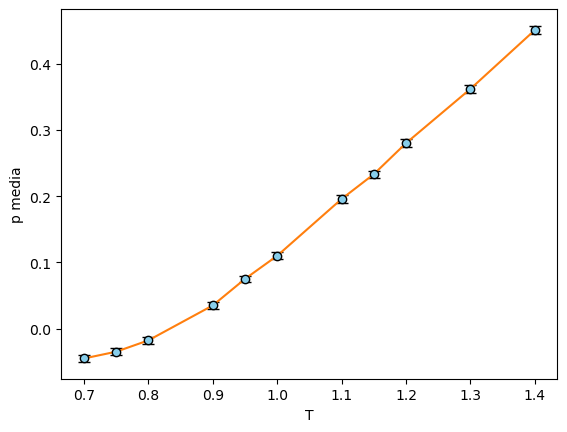

In [60]:
plt.errorbar(
    Ts, p_means,
    yerr=p_std_err,            
    fmt='o',                        
    ecolor='black', elinewidth=1,   
    capsize=4,                      
    markerfacecolor='skyblue', 
    markeredgecolor='k'
)
plt.plot(Ts,p_means)
plt.ylabel("p media")
plt.xlabel("T")
plt.show()

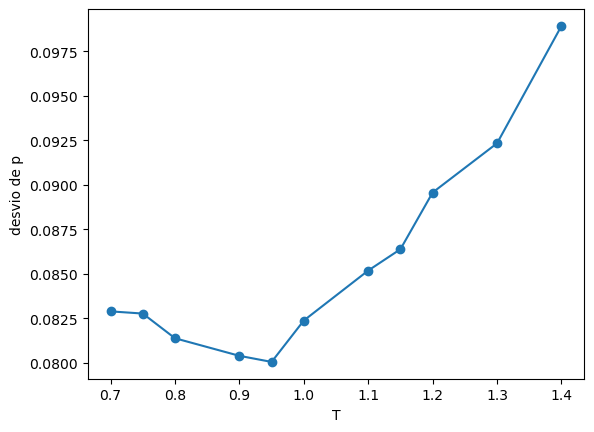

In [61]:
plt.plot(Ts,p_dev)
plt.scatter(Ts,p_dev)
plt.ylabel("desvio de p")
plt.xlabel("T")
plt.show()

El desvio de p esta en el rango 0.08 0.1 para todas las T (valores acordes a lo observado a T = 1.1y densidad = 0.4 previamente).
El desvio de p no parece depender variar respecto a T.